In [1]:
#importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures as plf
from sklearn.metrics import(confusion_matrix,
                            precision_score,
                            recall_score,
                            f1_score,
                            accuracy_score)

In [2]:
#importar datos 
#link Data: https://www.kaggle.com/zhengjiaqin/analyse-hr-comma-sep-data/data
file= 'HR_comma_sep.csv'
datos=pd.read_csv(file,
                       header=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True)
datos.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
%matplotlib inline

(array([  179.,   172.,   209.,   676.,  1030.,  1341.,   880.,   710.,
          704.,   668.,   824.,   694.,   717.,   706.,   761.,  1209.,
          844.,   825.,   770.,  1080.]),
 array([ 0.36 ,  0.392,  0.424,  0.456,  0.488,  0.52 ,  0.552,  0.584,
         0.616,  0.648,  0.68 ,  0.712,  0.744,  0.776,  0.808,  0.84 ,
         0.872,  0.904,  0.936,  0.968,  1.   ]),
 <a list of 20 Patch objects>)

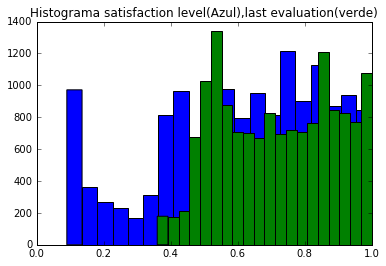

In [4]:
plt.hist(datos.satisfaction_level,bins=20)
plt.title('Histograma satisfaction level(Azul),last evaluation(verde)')
plt.hist(datos.last_evaluation,bins=20)


In [5]:
100*datos.left.sum()/len(datos)


23.80825388359224

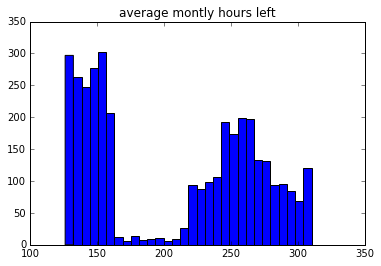

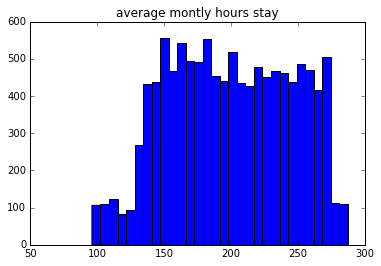

In [6]:
datosb=datos.left==1
datos1=datos[datosb]

datosb=datos.left==0
datos2=datos[datosb]
plt.hist(datos1.average_montly_hours,bins=30)
plt.title('average montly hours left')
plt.show()

plt.hist(datos2.average_montly_hours,bins=30)
plt.title('average montly hours stay')
plt.show()

In [7]:
#tratar variables cualitativas
 # variable "salary"
#datos=datos.replace('low',1)  
#datos=datos.replace('medium',2) 
#datos=datos.replace('high',3) 
datos['salary']=datos.salary.map({'low':1,'medium':2,'high':3})
 #variable "sales=area"
rh=datos.iloc[:,0:8]
temp=pd.get_dummies(datos['sales'])
temp1=datos.iloc[:,9:10]
datos=rh.join(temp).join(temp1)    
datos

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
5,0.41,0.50,2,153,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
6,0.10,0.77,6,247,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
7,0.92,0.85,5,259,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8,0.89,1.00,5,224,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9,0.42,0.53,2,142,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
#separar "x,y"
#m,n=np.shape(datos)
#Y=datos.iloc[:,6:7]
#X=datos.ix[:, datos.columns != 'left']
#normalizar "x" 
#X=X.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

In [ ]:
#separar datos de entrenamiento, prueba y validación
#X_train, X_other, Y_train, Y_other = train_test_split(X, Y, test_size=0.4, random_state=0)
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_cross, X_test, Y_cross, Y_test = train_test_split(X_other, Y_other, test_size=0.5, random_state=5)
#X_train = pd.DataFrame(scaler.transform(X_train))
#X_cross = pd.DataFrame(scaler.transform(X_cross))
#X_test = pd.DataFrame(scaler.transform(X_test))
#X_train.head()

In [8]:
def regresion_log(Data_set,pol_degree,c,umbral):
    datos=Data_set
    #separar "x,y"
    m,n=np.shape(datos)
    Y=datos.iloc[:,6:7]
    X=datos.ix[:, datos.columns != 'left']
    #normalizar "x" 
    X=X.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
    
    #separar datos de entrenamiento, prueba y validación
    X_train, X_other, Y_train, Y_other = train_test_split(X, Y, test_size=0.4, random_state=0)
    X_cross, X_test, Y_cross, Y_test = train_test_split(X_other, Y_other, test_size=0.5, random_state=5)
    
    #entrenar modelo con training data set
      
    X_train_kernel = plf(degree=pol_degree).fit_transform(X_train) #kernel
    reglog=linear_model.LogisticRegression(C=c)#crear el modelo, # la "c" es la c de la regresion regularizada,
    #Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values
    #specify stronger regularization.
    reglog.fit(X_train_kernel,Y_train)# entrenar el modelo

    # seleccion post-modelado

    w=reglog.coef_
    wabs=np.abs(w)
    plt.bar(np.arange(len(wabs[0])),wabs[0])

    index=wabs>umbral
    x_train_redu=X_train_kernel[:,index[0]]

    # entrenar de nuevo el modelo con variables reducidas 

    reglog2=linear_model.LogisticRegression(C=c)
    reglog2.fit(x_train_redu,Y_train)
    
    #tratar X_cross antes de predicciones(kernel y reduccion post-modelado)
    X_cross_kernel = plf(degree=pol_degree).fit_transform(X_cross)
    x_cross_redu=X_cross_kernel[:,index[0]]                                                     
    
    # hacer predicciones de cross-validation data set
    
    Yg=reglog2.predict(x_cross_redu)
    cm=confusion_matrix(Y_cross,Yg)
    
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t C: %1.3f' %c)
    print('\t umbral: %1.3f' %umbral)
    print ('\t Accuracy: %1.3f' %accuracy_score(Y_cross,Yg))
    print ('\t Precision: %1.3f' %precision_score(Y_cross,Yg))
    print ('\t Recall: %1.3f' %recall_score(Y_cross,Yg))
    print ('\t F1: %1.3f' %f1_score(Y_cross,Yg))
    print('\t numero de variables %1.3f' %np.shape(x_cross_redu))
    
    #tratar X_test antes de predicciones(kernel y reduccion post-modelado)
    X_test_kernel = plf(degree=pol_degree).fit_transform(X_test)
    x_test_redu=X_test_kernel[:,index[0]]                                                     
    
    # hacer predicciones de test data set
    
    Yg2=reglog2.predict(x_test_redu)
    cm2=confusion_matrix(Y_test,Yg2)
    
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t C: %1.3f' %c)
    print('\t umbral: %1.3f' %umbral)
    print ('\t Accuracy: %1.3f' %accuracy_score(Y_test,Yg2))
    print ('\t Precision: %1.3f' %precision_score(Y_test,Yg2))
    print ('\t Recall: %1.3f' %recall_score(Y_test,Yg2))
    print ('\t F1: %1.3f' %f1_score(Y_test,Yg2))
    print('\t numero de variables %1.3f' %np.shape(x_test_redu))
    
    #numvariables=np.shape(x_cross_redu)
  
    return   recall_score(Y_cross,Yg),recall_score(Y_test,Yg2)

In [2]:
# float range
#import decimal
#c=np.linspace(0.5,1.5,num=3)
#c
def frange(x, y, jump):
  while x <= y:
    yield x
    x += jump

In [3]:
frange(.5,1.5,.5)

<generator object frange at 0x032022D0>

C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.000
	 Accuracy: 0.800
	 Precision: 0.616
	 Recall: 0.382
	 F1: 0.472
	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.000
	 Accuracy: 0.794
	 Precision: 0.559
	 Recall: 0.356
	 F1: 0.435


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.100
	 Accuracy: 0.804
	 Precision: 0.626
	 Recall: 0.399
	 F1: 0.488
	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.100
	 Accuracy: 0.802
	 Precision: 0.584
	 Recall: 0.385
	 F1: 0.464


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.200
	 Accuracy: 0.802
	 Precision: 0.622
	 Recall: 0.392
	 F1: 0.481
	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.200
	 Accuracy: 0.798
	 Precision: 0.571
	 Recall: 0.371
	 F1: 0.450


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.300
	 Accuracy: 0.814
	 Precision: 0.648
	 Recall: 0.444
	 F1: 0.527
	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.300
	 Accuracy: 0.809
	 Precision: 0.601
	 Recall: 0.428
	 F1: 0.500
	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.400
	 Accuracy: 0.802
	 Precision: 0.638
	 Recall: 0.354
	 F1: 0.455
	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.400
	 Accuracy: 0.801
	 Precision: 0.599
	 Recall: 0.326
	 F1: 0.422


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.500
	 Accuracy: 0.771
	 Precision: 0.522
	 Recall: 0.254
	 F1: 0.342
	 Grado polinomio 1.000
	 C: 0.500
	 umbral: 0.500
	 Accuracy: 0.773
	 Precision: 0.481
	 Recall: 0.231
	 F1: 0.312
	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.000
	 Accuracy: 0.801
	 Precision: 0.618
	 Recall: 0.385
	 F1: 0.475
	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.000
	 Accuracy: 0.794
	 Precision: 0.560
	 Recall: 0.358
	 F1: 0.437


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.100
	 Accuracy: 0.805
	 Precision: 0.629
	 Recall: 0.404
	 F1: 0.492
	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.100
	 Accuracy: 0.802
	 Precision: 0.585
	 Recall: 0.388
	 F1: 0.466


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.200
	 Accuracy: 0.802
	 Precision: 0.622
	 Recall: 0.392
	 F1: 0.481
	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.200
	 Accuracy: 0.798
	 Precision: 0.570
	 Recall: 0.371
	 F1: 0.450


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.300
	 Accuracy: 0.814
	 Precision: 0.648
	 Recall: 0.444
	 F1: 0.527
	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.300
	 Accuracy: 0.809
	 Precision: 0.601
	 Recall: 0.428
	 F1: 0.500


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.400
	 Accuracy: 0.802
	 Precision: 0.638
	 Recall: 0.354
	 F1: 0.455
	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.400
	 Accuracy: 0.801
	 Precision: 0.599
	 Recall: 0.326
	 F1: 0.422


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.500
	 Accuracy: 0.771
	 Precision: 0.522
	 Recall: 0.254
	 F1: 0.342
	 Grado polinomio 1.000
	 C: 1.000
	 umbral: 0.500
	 Accuracy: 0.773
	 Precision: 0.481
	 Recall: 0.231
	 F1: 0.312


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.000
	 Accuracy: 0.801
	 Precision: 0.618
	 Recall: 0.385
	 F1: 0.475
	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.000
	 Accuracy: 0.794
	 Precision: 0.560
	 Recall: 0.358
	 F1: 0.437
	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.100
	 Accuracy: 0.805
	 Precision: 0.629
	 Recall: 0.404
	 F1: 0.492


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.100
	 Accuracy: 0.802
	 Precision: 0.585
	 Recall: 0.388
	 F1: 0.466
	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.200
	 Accuracy: 0.802
	 Precision: 0.622
	 Recall: 0.392
	 F1: 0.481
	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.200
	 Accuracy: 0.798
	 Precision: 0.570
	 Recall: 0.371
	 F1: 0.450


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.300
	 Accuracy: 0.814
	 Precision: 0.648
	 Recall: 0.444
	 F1: 0.527
	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.300
	 Accuracy: 0.809
	 Precision: 0.601
	 Recall: 0.428
	 F1: 0.500
	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.400
	 Accuracy: 0.802
	 Precision: 0.638
	 Recall: 0.354
	 F1: 0.455


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.400
	 Accuracy: 0.801
	 Precision: 0.599
	 Recall: 0.326
	 F1: 0.422
	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.500
	 Accuracy: 0.771
	 Precision: 0.522
	 Recall: 0.254
	 F1: 0.342


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 1.000
	 C: 1.500
	 umbral: 0.500
	 Accuracy: 0.773
	 Precision: 0.481
	 Recall: 0.231
	 F1: 0.312


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.000
	 Accuracy: 0.952
	 Precision: 0.902
	 Recall: 0.890
	 F1: 0.896
	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.000
	 Accuracy: 0.951
	 Precision: 0.879
	 Recall: 0.906
	 F1: 0.892


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.100
	 Accuracy: 0.952
	 Precision: 0.900
	 Recall: 0.894
	 F1: 0.897
	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.100
	 Accuracy: 0.952
	 Precision: 0.876
	 Recall: 0.912
	 F1: 0.894


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.200
	 Accuracy: 0.950
	 Precision: 0.894
	 Recall: 0.892
	 F1: 0.893
	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.200
	 Accuracy: 0.954
	 Precision: 0.883
	 Recall: 0.913
	 F1: 0.898


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.300
	 Accuracy: 0.951
	 Precision: 0.896
	 Recall: 0.896
	 F1: 0.896
	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.300
	 Accuracy: 0.952
	 Precision: 0.872
	 Recall: 0.918
	 F1: 0.894


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.400
	 Accuracy: 0.949
	 Precision: 0.891
	 Recall: 0.889
	 F1: 0.890
	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.400
	 Accuracy: 0.949
	 Precision: 0.865
	 Recall: 0.915
	 F1: 0.889


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.500
	 Accuracy: 0.947
	 Precision: 0.882
	 Recall: 0.893
	 F1: 0.887
	 Grado polinomio 2.000
	 C: 0.500
	 umbral: 0.500
	 Accuracy: 0.949
	 Precision: 0.866
	 Recall: 0.913
	 F1: 0.889


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.000
	 Accuracy: 0.952
	 Precision: 0.902
	 Recall: 0.890
	 F1: 0.896
	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.000
	 Accuracy: 0.952
	 Precision: 0.880
	 Recall: 0.907
	 F1: 0.893


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.100
	 Accuracy: 0.951
	 Precision: 0.898
	 Recall: 0.893
	 F1: 0.896
	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.100
	 Accuracy: 0.951
	 Precision: 0.876
	 Recall: 0.910
	 F1: 0.893


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.200
	 Accuracy: 0.950
	 Precision: 0.895
	 Recall: 0.890
	 F1: 0.893
	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.200
	 Accuracy: 0.953
	 Precision: 0.883
	 Recall: 0.912
	 F1: 0.897


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.300
	 Accuracy: 0.952
	 Precision: 0.900
	 Recall: 0.896
	 F1: 0.898
	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.300
	 Accuracy: 0.952
	 Precision: 0.872
	 Recall: 0.918
	 F1: 0.894


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.400
	 Accuracy: 0.949
	 Precision: 0.893
	 Recall: 0.890
	 F1: 0.891
	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.400
	 Accuracy: 0.950
	 Precision: 0.867
	 Recall: 0.915
	 F1: 0.890


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.500
	 Accuracy: 0.947
	 Precision: 0.880
	 Recall: 0.893
	 F1: 0.887
	 Grado polinomio 2.000
	 C: 1.000
	 umbral: 0.500
	 Accuracy: 0.949
	 Precision: 0.866
	 Recall: 0.913
	 F1: 0.889


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.000
	 Accuracy: 0.952
	 Precision: 0.902
	 Recall: 0.890
	 F1: 0.896
	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.000
	 Accuracy: 0.951
	 Precision: 0.877
	 Recall: 0.907
	 F1: 0.892


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.100
	 Accuracy: 0.952
	 Precision: 0.898
	 Recall: 0.894
	 F1: 0.896
	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.100
	 Accuracy: 0.951
	 Precision: 0.876
	 Recall: 0.910
	 F1: 0.893


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.200
	 Accuracy: 0.950
	 Precision: 0.894
	 Recall: 0.890
	 F1: 0.892
	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.200
	 Accuracy: 0.953
	 Precision: 0.883
	 Recall: 0.912
	 F1: 0.897


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.300
	 Accuracy: 0.952
	 Precision: 0.900
	 Recall: 0.896
	 F1: 0.898
	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.300
	 Accuracy: 0.951
	 Precision: 0.871
	 Recall: 0.918
	 F1: 0.894


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.400
	 Accuracy: 0.950
	 Precision: 0.893
	 Recall: 0.892
	 F1: 0.892
	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.400
	 Accuracy: 0.950
	 Precision: 0.868
	 Recall: 0.915
	 F1: 0.891


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.500
	 Accuracy: 0.947
	 Precision: 0.880
	 Recall: 0.893
	 F1: 0.887
	 Grado polinomio 2.000
	 C: 1.500
	 umbral: 0.500
	 Accuracy: 0.949
	 Precision: 0.866
	 Recall: 0.913
	 F1: 0.889


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.000
	 Accuracy: 0.959
	 Precision: 0.903
	 Recall: 0.922
	 F1: 0.912
	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.000
	 Accuracy: 0.963
	 Precision: 0.912
	 Recall: 0.925
	 F1: 0.918


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.100
	 Accuracy: 0.958
	 Precision: 0.901
	 Recall: 0.922
	 F1: 0.911
	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.100
	 Accuracy: 0.961
	 Precision: 0.905
	 Recall: 0.922
	 F1: 0.913


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.200
	 Accuracy: 0.954
	 Precision: 0.897
	 Recall: 0.909
	 F1: 0.903
	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.200
	 Accuracy: 0.961
	 Precision: 0.902
	 Recall: 0.925
	 F1: 0.914


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.300
	 Accuracy: 0.958
	 Precision: 0.907
	 Recall: 0.914
	 F1: 0.911
	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.300
	 Accuracy: 0.961
	 Precision: 0.909
	 Recall: 0.916
	 F1: 0.913


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.400
	 Accuracy: 0.955
	 Precision: 0.899
	 Recall: 0.912
	 F1: 0.905
	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.400
	 Accuracy: 0.959
	 Precision: 0.897
	 Recall: 0.922
	 F1: 0.909


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.500
	 Accuracy: 0.955
	 Precision: 0.900
	 Recall: 0.910
	 F1: 0.905
	 Grado polinomio 3.000
	 C: 0.500
	 umbral: 0.500
	 Accuracy: 0.952
	 Precision: 0.876
	 Recall: 0.912
	 F1: 0.894


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.000
	 Accuracy: 0.957
	 Precision: 0.897
	 Recall: 0.922
	 F1: 0.909
	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.000
	 Accuracy: 0.964
	 Precision: 0.913
	 Recall: 0.927
	 F1: 0.920


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.100
	 Accuracy: 0.957
	 Precision: 0.894
	 Recall: 0.924
	 F1: 0.909
	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.100
	 Accuracy: 0.962
	 Precision: 0.909
	 Recall: 0.924
	 F1: 0.916


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.200
	 Accuracy: 0.955
	 Precision: 0.897
	 Recall: 0.914
	 F1: 0.905
	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.200
	 Accuracy: 0.960
	 Precision: 0.898
	 Recall: 0.925
	 F1: 0.912


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.300
	 Accuracy: 0.955
	 Precision: 0.897
	 Recall: 0.912
	 F1: 0.904
	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.300
	 Accuracy: 0.959
	 Precision: 0.898
	 Recall: 0.922
	 F1: 0.910


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.400
	 Accuracy: 0.954
	 Precision: 0.895
	 Recall: 0.912
	 F1: 0.903
	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.400
	 Accuracy: 0.958
	 Precision: 0.894
	 Recall: 0.922
	 F1: 0.908


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.500
	 Accuracy: 0.955
	 Precision: 0.904
	 Recall: 0.903
	 F1: 0.904
	 Grado polinomio 3.000
	 C: 1.000
	 umbral: 0.500
	 Accuracy: 0.953
	 Precision: 0.880
	 Recall: 0.915
	 F1: 0.897


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.000
	 Accuracy: 0.956
	 Precision: 0.895
	 Recall: 0.922
	 F1: 0.908
	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.000
	 Accuracy: 0.964
	 Precision: 0.913
	 Recall: 0.927
	 F1: 0.920


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.100
	 Accuracy: 0.957
	 Precision: 0.893
	 Recall: 0.926
	 F1: 0.909
	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.100
	 Accuracy: 0.962
	 Precision: 0.906
	 Recall: 0.924
	 F1: 0.915


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.200
	 Accuracy: 0.955
	 Precision: 0.895
	 Recall: 0.914
	 F1: 0.905
	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.200
	 Accuracy: 0.959
	 Precision: 0.894
	 Recall: 0.925
	 F1: 0.909


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.300
	 Accuracy: 0.954
	 Precision: 0.897
	 Recall: 0.909
	 F1: 0.903
	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.300
	 Accuracy: 0.961
	 Precision: 0.904
	 Recall: 0.921
	 F1: 0.912


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.400
	 Accuracy: 0.955
	 Precision: 0.897
	 Recall: 0.910
	 F1: 0.904
	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.400
	 Accuracy: 0.959
	 Precision: 0.904
	 Recall: 0.915
	 F1: 0.909


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.500
	 Accuracy: 0.956
	 Precision: 0.906
	 Recall: 0.906
	 F1: 0.906
	 Grado polinomio 3.000
	 C: 1.500
	 umbral: 0.500
	 Accuracy: 0.953
	 Precision: 0.879
	 Recall: 0.915
	 F1: 0.897


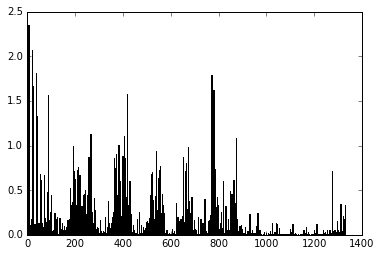

In [10]:
resultados=np.zeros((60,2))
i=0
for pol_degree in range(1,4):
    for c in frange(.5,1.5,.5):
        for umbral in frange(0,0.5,.1):
            resultados[i,0],resultados[i,1]=regresion_log(datos,pol_degree,c,umbral)
            i=i+1
        
            

In [11]:
resultados


array([[ 0.38231098,  0.35628743],
       [ 0.39942939,  0.38473054],
       [ 0.39229672,  0.37125749],
       [ 0.44365193,  0.42814371],
       [ 0.35378031,  0.32634731],
       [ 0.25392297,  0.23053892],
       [ 0.38516405,  0.35778443],
       [ 0.40370899,  0.38772455],
       [ 0.39229672,  0.37125749],
       [ 0.44365193,  0.42814371],
       [ 0.35378031,  0.32634731],
       [ 0.25392297,  0.23053892],
       [ 0.38516405,  0.35778443],
       [ 0.40370899,  0.38772455],
       [ 0.39229672,  0.37125749],
       [ 0.44365193,  0.42814371],
       [ 0.35378031,  0.32634731],
       [ 0.25392297,  0.23053892],
       [ 0.89015692,  0.90568862],
       [ 0.89443652,  0.91167665],
       [ 0.89158345,  0.91317365],
       [ 0.89586305,  0.91766467],
       [ 0.88873039,  0.91467066],
       [ 0.89300999,  0.91317365],
       [ 0.89015692,  0.90718563],
       [ 0.89300999,  0.91017964],
       [ 0.89015692,  0.91167665],
       [ 0.89586305,  0.91766467],
       [ 0.89015692,

In [20]:
sumaresultados=pd.DataFrame(resultados[:,0]+resultados[:,1])
mejormodelo=sumaresultados.apply(np.argmax,axis=0)
print (mejormodelo)
sumaresultados.loc[49,0]

0    49
dtype: int64


1.8494729513868127

In [28]:
print(resultados[49,0])
print(resultados[49,1])
print('el modelo con polinomio grado 3, C=1.5 y umbral de 0.1 fue el mejor')

0.925820256776
0.923652694611
el modelo con polinomio grado 3, C=1.5 y umbral de 0.1 fue el mejor
